## EDA y Transformacion de datos
En este notebook se tomaran los archivos json que se encuentran en la carpeta Fuente_json que contienen informacion sobre cardano y se les realizaran las transformaciones necesarias y el analisis respectivo, luego de esto los dataframes resultantes se exportaran a archivos .xlsx los cualses quedan almacenados el la carpera Datos_Procesados en la subcarpeta respectiva.

Creacion de dataframe a partir del archivo fuente .json

In [1]:
import json
import pandas as pd

# Cargar el JSON desde el archivo
with open('../Data/Fuente_json/cardano/coin_id_cardano.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Crear un nuevo diccionario para almacenar los datos no anidados
flat_data = {
    'id': data['id'],
    'symbol': data['symbol'],
    'name': data['name'],
    'block_time_in_minutes': data['block_time_in_minutes'],
    'hashing_algorithm': data['hashing_algorithm'],
    'description': data['description']['en'],
    'homepage': ', '.join(data['links']['homepage']),
    'reddit_subscribers': data['community_data']['reddit_subscribers'],
    'twitter_followers': data['community_data']['twitter_followers'],
    'github_repos': ', '.join(data['links']['repos_url']['github']),
    'last_updated': data['last_updated']
}

# Crear un DataFrame a partir de los datos no anidados
coin_id_cardano1 = pd.DataFrame([flat_data])

# Imprimir el DataFrame
print(coin_id_cardano1)

        id symbol     name  block_time_in_minutes hashing_algorithm  \
0  cardano    ada  Cardano                      0              None   

  description                              homepage  reddit_subscribers  \
0              https://www.cardano.org/en/home/, ,                    0   

   twitter_followers                                       github_repos  \
0             838746  https://github.com/input-output-hk/cardano-sl,...   

               last_updated  
0  2023-08-14T05:36:07.839Z  


hay columnas que no aportan valor para la clase de analisis que se va a realizar por lo que se eliminan estas columnas.

In [2]:
#Eliminar columnas
coin_id_cardano1.drop(['homepage',"github_repos","last_updated","description"] , axis=1, inplace=True)

In [3]:
print(coin_id_cardano1)

        id symbol     name  block_time_in_minutes hashing_algorithm  \
0  cardano    ada  Cardano                      0              None   

   reddit_subscribers  twitter_followers  
0                   0             838746  


## grafico
para las categorias de block_time_in_minutes','reddit_subscribers','twitter_followers'

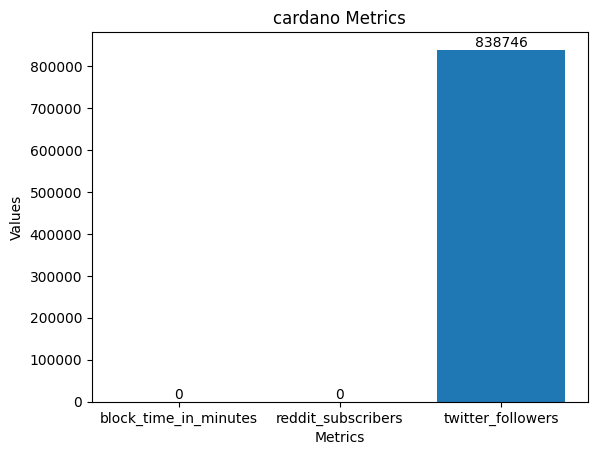

In [4]:
import matplotlib.pyplot as plt

# Datos del DataFrame
data = {
    'block_time_in_minutes': coin_id_cardano1['block_time_in_minutes'][0],
    'reddit_subscribers': coin_id_cardano1['reddit_subscribers'][0],
    'twitter_followers': coin_id_cardano1['twitter_followers'][0]
}

# Crear una figura y ejes
fig, ax = plt.subplots()

# Crear el gráfico de barras
bars = ax.bar(data.keys(), data.values())

# Agregar etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Configurar el título y etiquetas de los ejes
ax.set_title('cardano Metrics')
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')

# Mostrar el gráfico
plt.show()

exportacion del dataframe a archivo .xlsx

In [5]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_cardano1.to_excel("..\Data\Datos_Procesados/cardano\coin_id_cardano1.xlsx", sheet_name="coin_id_cardano1.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir del archivo fuente .json

In [6]:
# Cargar el JSON desde el archivo
with open('..\Data\Fuente_json/cardano\coin_id_cardano.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Función para aplanar diccionarios anidados
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f"{parent_key}{sep}{k}" if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

# Aplanar los datos anidados del JSON
flattened_data = flatten_dict(data)

# Crear un DataFrame a partir de los datos aplanados
coin_id_cardano2 = pd.DataFrame([flattened_data])

# Imprimir el DataFrame
print(coin_id_cardano2)

        id symbol     name asset_platform_id platforms_  \
0  cardano    ada  Cardano              None              

  detail_platforms__decimal_place detail_platforms__contract_address  \
0                            None                                      

   block_time_in_minutes hashing_algorithm  \
0                      0              None   

                                          categories  ...  \
0  [Alleged SEC Securities, Layer 1 (L1), Cardano...  ...   

  developer_data_pull_requests_merged  \
0                                1706   

  developer_data_pull_request_contributors  \
0                                       80   

  developer_data_code_additions_deletions_4_weeks_additions  \
0                                                  0          

  developer_data_code_additions_deletions_4_weeks_deletions  \
0                                                  0          

  developer_data_commit_count_4_weeks  \
0                                   0   

  devel

In [7]:
coin_id_cardano2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 62 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   id                                                         1 non-null      object 
 1   symbol                                                     1 non-null      object 
 2   name                                                       1 non-null      object 
 3   asset_platform_id                                          0 non-null      object 
 4   platforms_                                                 1 non-null      object 
 5   detail_platforms__decimal_place                            0 non-null      object 
 6   detail_platforms__contract_address                         1 non-null      object 
 7   block_time_in_minutes                                      1 non-null      int64  
 8   hashing_algori

Valores faltantes

In [8]:
missing_values = coin_id_cardano2.isnull().sum()
print(missing_values)

id                                                    0
symbol                                                0
name                                                  0
asset_platform_id                                     1
platforms_                                            0
                                                     ..
developer_data_last_4_weeks_commit_activity_series    0
public_interest_stats_alexa_rank                      0
public_interest_stats_bing_matches                    1
status_updates                                        0
last_updated                                          0
Length: 62, dtype: int64


Exportar dataframe a archivo .xlsx

In [9]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_cardano2.to_excel("..\Data\Datos_Procesados/cardano\coin_id_cardano2.xlsx", sheet_name="coin_id_cardano2.xlsx", index=False, float_format="%.2f")

Creacion de dataframe a partir de archivo fuente .json

In [10]:
with open('..\Data\Fuente_json/cardano\coin_id_market_chart_cardano.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_market_chart_cardano= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_market_chart_cardano)


                     prices                          market_caps  \
0     [1508284800000, 0.03]   [1508284800000, 696021404.3079604]   
1     [1508371200000, 0.03]   [1508371200000, 695622018.2559936]   
2     [1508457600000, 0.03]   [1508457600000, 785580027.6424098]   
3     [1508544000000, 0.03]   [1508544000000, 741202123.8797704]   
4     [1508630400000, 0.03]   [1508630400000, 720669848.4724126]   
...                     ...                                  ...   
2123   [1691712000000, 0.3]  [1691712000000, 10375263805.247583]   
2124  [1691798400000, 0.29]  [1691798400000, 10278658176.642065]   
2125  [1691884800000, 0.29]  [1691884800000, 10217585439.953056]   
2126  [1691971200000, 0.29]  [1691971200000, 10135047904.827347]   
2127  [1691994199000, 0.29]  [1691994199000, 10183212311.916904]   

                            total_volumes  
0      [1508284800000, 2351678.122306208]  
1     [1508371200000, 2815155.9695999967]  
2      [1508457600000, 8883473.082062634]  
3      

tratamiento de columnas como listas

In [11]:
# Descomponer las listas en columnas separadas
coin_id_market_chart_cardano['timestamp'] = coin_id_market_chart_cardano['prices'].apply(lambda x: x[0])
coin_id_market_chart_cardano['price'] = coin_id_market_chart_cardano['prices'].apply(lambda x: x[1])
coin_id_market_chart_cardano['market_cap'] = coin_id_market_chart_cardano['market_caps'].apply(lambda x: x[1])
coin_id_market_chart_cardano['volume'] = coin_id_market_chart_cardano['total_volumes'].apply(lambda x: x[1])

# Convertir los valores a tipos de datos adecuados
coin_id_market_chart_cardano['timestamp'] = pd.to_datetime(coin_id_market_chart_cardano['timestamp'], unit='ms')
coin_id_market_chart_cardano['price'] = pd.to_numeric(coin_id_market_chart_cardano['price'])
coin_id_market_chart_cardano['market_cap'] = pd.to_numeric(coin_id_market_chart_cardano['market_cap'])
coin_id_market_chart_cardano['volume'] = pd.to_numeric(coin_id_market_chart_cardano['volume'])

# Eliminar las columnas originales de listas
coin_id_market_chart_cardano.drop(['prices', 'market_caps', 'total_volumes'], axis=1, inplace=True)

# Mostrar el DataFrame modificado
print(coin_id_market_chart_cardano)

               timestamp  price    market_cap        volume
0    2017-10-18 00:00:00   0.03  6.960214e+08  2.351678e+06
1    2017-10-19 00:00:00   0.03  6.956220e+08  2.815156e+06
2    2017-10-20 00:00:00   0.03  7.855800e+08  8.883473e+06
3    2017-10-21 00:00:00   0.03  7.412021e+08  5.308857e+06
4    2017-10-22 00:00:00   0.03  7.206698e+08  2.901876e+06
...                  ...    ...           ...           ...
2123 2023-08-11 00:00:00   0.30  1.037526e+10  1.794778e+08
2124 2023-08-12 00:00:00   0.29  1.027866e+10  1.246106e+08
2125 2023-08-13 00:00:00   0.29  1.021759e+10  1.056080e+08
2126 2023-08-14 00:00:00   0.29  1.013505e+10  1.251063e+08
2127 2023-08-14 06:23:19   0.29  1.018321e+10  1.442569e+08

[2128 rows x 4 columns]


transformacion de datos

In [12]:
# Convertir la columna 'timestamp' a tipo datetime
coin_id_market_chart_cardano['timestamp'] = pd.to_datetime(coin_id_market_chart_cardano['timestamp'])

# Obtener solo la fecha de la columna 'timestamp'
coin_id_market_chart_cardano['timestamp'] = coin_id_market_chart_cardano['timestamp'].dt.date

In [13]:
coin_id_market_chart_cardano

,timestamp,price,market_cap,volume
0,2017-10-18,0.03,6.960214e+08,2.351678e+06
1,2017-10-19,0.03,6.956220e+08,2.815156e+06
2,2017-10-20,0.03,7.855800e+08,8.883473e+06
3,2017-10-21,0.03,7.412021e+08,5.308857e+06
4,2017-10-22,0.03,7.206698e+08,2.901876e+06
...,...,...,...,...
2123,2023-08-11,0.30,1.037526e+10,1.794778e+08
2124,2023-08-12,0.29,1.027866e+10,1.246106e+08
2125,2023-08-13,0.29,1.021759e+10,1.056080e+08
2126,2023-08-14,0.29,1.013505e+10,1.251063e+08


In [14]:
# cambiar nombre columna
coin_id_market_chart_cardano.rename(columns={'timestamp': 'date'}, inplace=True)

In [15]:
print(coin_id_market_chart_cardano)

            date  price    market_cap        volume
0     2017-10-18   0.03  6.960214e+08  2.351678e+06
1     2017-10-19   0.03  6.956220e+08  2.815156e+06
2     2017-10-20   0.03  7.855800e+08  8.883473e+06
3     2017-10-21   0.03  7.412021e+08  5.308857e+06
4     2017-10-22   0.03  7.206698e+08  2.901876e+06
...          ...    ...           ...           ...
2123  2023-08-11   0.30  1.037526e+10  1.794778e+08
2124  2023-08-12   0.29  1.027866e+10  1.246106e+08
2125  2023-08-13   0.29  1.021759e+10  1.056080e+08
2126  2023-08-14   0.29  1.013505e+10  1.251063e+08
2127  2023-08-14   0.29  1.018321e+10  1.442569e+08

[2128 rows x 4 columns]


In [16]:
coin_id_market_chart_cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        2128 non-null   object 
 1   price       2128 non-null   float64
 2   market_cap  2128 non-null   float64
 3   volume      2128 non-null   float64
dtypes: float64(3), object(1)
memory usage: 66.6+ KB


## Grafico
para evidenciar outliers

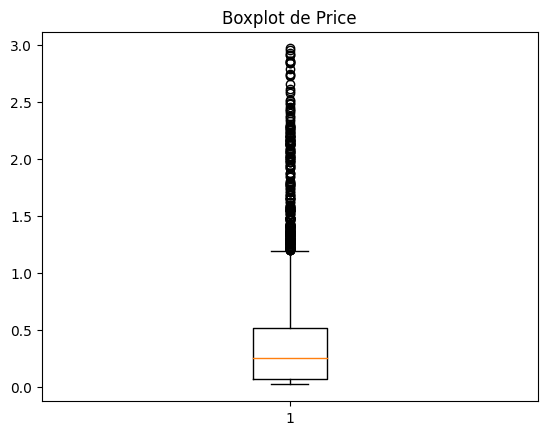

In [17]:
import matplotlib.pyplot as plt
plt.boxplot(coin_id_market_chart_cardano['price'])
plt.title('Boxplot de Price')
plt.show()

## Grafico de lineas dobles
para evidenciar como han evolucionado entre si el precio y la capitalizacion del mercado

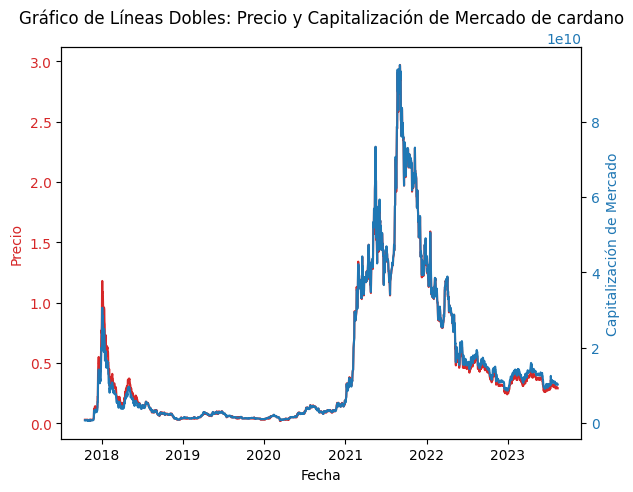

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_cardano['date'] = pd.to_datetime(coin_id_market_chart_cardano['date'])

# Crear el gráfico de líneas dobles
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio', color=color)
ax1.plot(coin_id_market_chart_cardano['date'], coin_id_market_chart_cardano['price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eje y
color = 'tab:blue'
ax2.set_ylabel('Capitalización de Mercado', color=color)
ax2.plot(coin_id_market_chart_cardano['date'], coin_id_market_chart_cardano['market_cap'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño del gráfico
plt.title('Gráfico de Líneas Dobles: Precio y Capitalización de Mercado de cardano')
plt.show()

## Gráfico de Retorno Diario
Para calcular los retornos diarios del precio y vizulalizar cómo varían en función de los días.

C:\Users\Gio\AppData\Local\Temp\ipykernel_7456\1373811460.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()


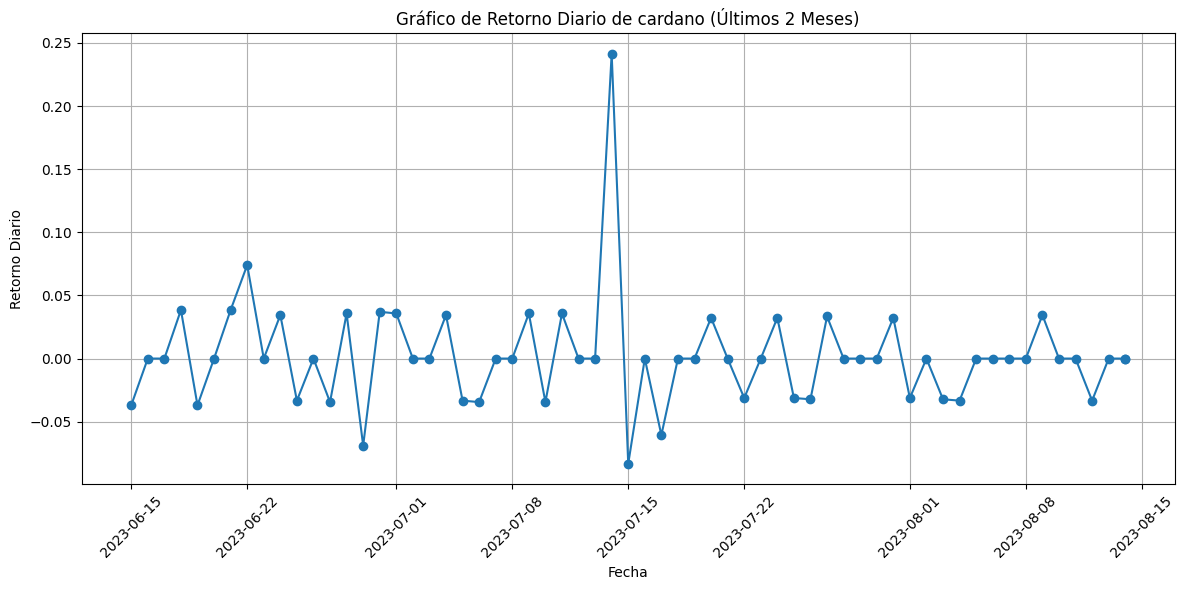

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_cardano['date'] = pd.to_datetime(coin_id_market_chart_cardano['date'])

# Obtener la fecha actual
current_date = pd.to_datetime('2023-08-14')  # Cambia la fecha a la actual si es necesario

# Calcular la fecha 6 meses antes de la fecha actual
six_months_ago = current_date - pd.DateOffset(months=2)

# Filtrar los datos para los últimos 6 meses
data_last_6_months = coin_id_market_chart_cardano[
    (coin_id_market_chart_cardano['date'] >= six_months_ago) &
    (coin_id_market_chart_cardano['date'] <= current_date)
]

# Calcular los retornos diarios del precio
data_last_6_months['daily_return'] = data_last_6_months['price'].pct_change()

# Crear el gráfico de retorno diario
plt.figure(figsize=(12, 6))
plt.plot(data_last_6_months['date'], data_last_6_months['daily_return'], marker='o')
plt.title('Gráfico de Retorno Diario de cardano (Últimos 2 Meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Gráfico de Precios y Volumen
Se combinan dos series de datos en un solo gráfico para ver cómo los precios y el volumen de negociación están relacionados.

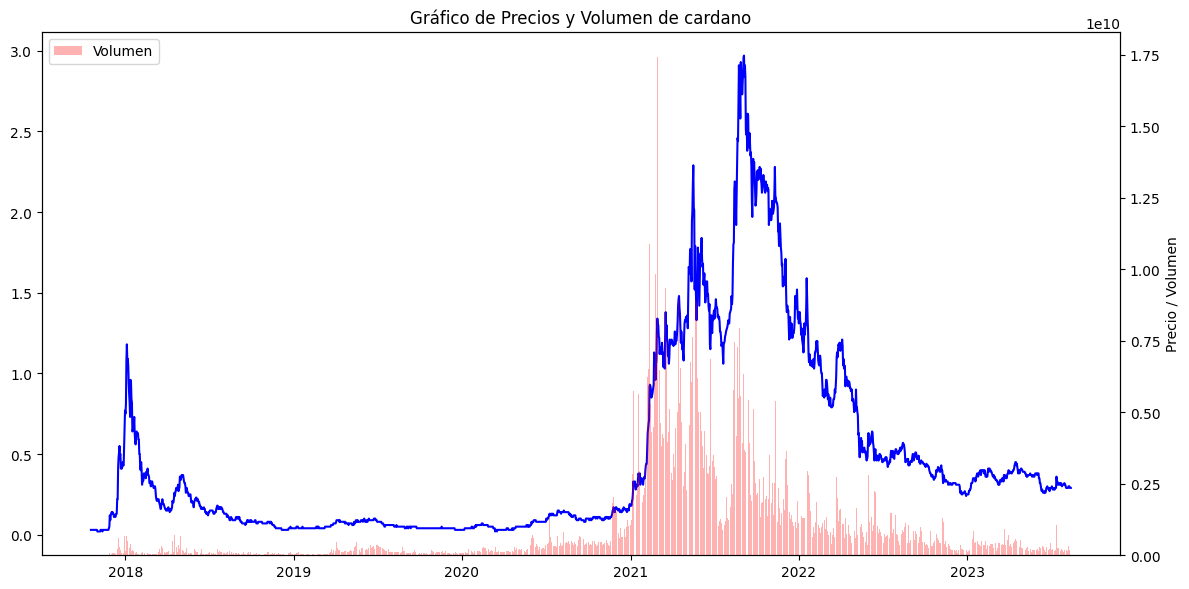

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'date' a tipo datetime
coin_id_market_chart_cardano['date'] = pd.to_datetime(coin_id_market_chart_cardano['date'])

# Crear el gráfico de precios y volumen combinados
plt.figure(figsize=(12, 6))

# Gráfico de precios (línea azul)
plt.plot(coin_id_market_chart_cardano['date'], coin_id_market_chart_cardano['price'], color='blue', label='Precio')

# Crear un segundo eje y para el volumen
plt.gca().twinx()

# Gráfico de volumen (barra roja)
plt.bar(coin_id_market_chart_cardano['date'], coin_id_market_chart_cardano['volume'], color='red', alpha=0.3, label='Volumen')

plt.title('Gráfico de Precios y Volumen de cardano')
plt.xlabel('Fecha')
plt.ylabel('Precio / Volumen')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [21]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_market_chart_cardano.to_excel("..\Data\Datos_Procesados/cardano\coin_id_market_chart_cardano.xlsx", sheet_name="coin_id_market_chart_cardano.xlsx", index=False, float_format="%.2f")

d:\Programs Instalds\Python\Program Instald\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


In [22]:
with open('..\Data\Fuente_json/cardano\coin_id_ohlc_cardano.json', 'r') as json_file:
    data = json.load(json_file)

# Crear un DataFrame a partir de los datos JSON
coin_id_ohlc_cardano= pd.DataFrame(data)

# Imprimir el DataFrame
print(coin_id_ohlc_cardano)

                 0     1     2     3     4
0    1508371200000  0.03  0.03  0.03  0.03
1    1508716800000  0.03  0.03  0.03  0.03
2    1509062400000  0.03  0.03  0.03  0.03
3    1509408000000  0.03  0.03  0.03  0.03
4    1509667200000  0.02  0.02  0.02  0.02
..             ...   ...   ...   ...   ...
550  1690761600000  0.31  0.32  0.31  0.32
551  1691020800000  0.31  0.31  0.30  0.30
552  1691366400000  0.29  0.29  0.29  0.29
553  1691712000000  0.29  0.30  0.29  0.30
554  1692057600000  0.29  0.29  0.29  0.29

[555 rows x 5 columns]


In [23]:
coin_id_ohlc_cardano[0] = pd.to_datetime(coin_id_ohlc_cardano[0], unit='ms')

In [24]:
# cambiar nombre columna
coin_id_ohlc_cardano.rename(columns={'date': 'Date', 1:'Open', 2:'High', 3:'Low', 4:'Close'}, inplace=True)

In [25]:
coin_id_ohlc_cardano

,0,Open,High,Low,Close
0,2017-10-19,0.03,0.03,0.03,0.03
1,2017-10-23,0.03,0.03,0.03,0.03
2,2017-10-27,0.03,0.03,0.03,0.03
3,2017-10-31,0.03,0.03,0.03,0.03
4,2017-11-03,0.02,0.02,0.02,0.02
...,...,...,...,...,...
550,2023-07-31,0.31,0.32,0.31,0.32
551,2023-08-03,0.31,0.31,0.30,0.30
552,2023-08-07,0.29,0.29,0.29,0.29
553,2023-08-11,0.29,0.30,0.29,0.30


In [26]:
coin_id_ohlc_cardano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       555 non-null    datetime64[ns]
 1   Open    555 non-null    float64       
 2   High    555 non-null    float64       
 3   Low     555 non-null    float64       
 4   Close   555 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 21.8 KB


In [27]:
# Guardar DataFrame como archivo de Excel en una ubicación específica
coin_id_ohlc_cardano.to_excel("..\Data\Datos_Procesados/cardano\coin_id_ohlc_cardano.xlsx", sheet_name="coin_id_ohlc_cardano.xlsx", index=False, float_format="%.2f")